<a href="https://colab.research.google.com/github/punam-bhattarai/Data-Visualization/blob/Data-Visualization/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Housing Price Prediction Using Linear Regression**

In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [330]:
data= pd.read_csv('Housingprice.csv')


In [331]:

data.head(5)


,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [332]:
# Dropping the 'Unnamed: 0' column as it's just identifier
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head(5)



,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [333]:
print('Shape of DataFrame: ',data.shape,'\n')

Shape of DataFrame:  (546, 12) 



About Dataset There are  546 rows and 12 columns in the dataset, each are:

*   price: The price of the property.
*   lotsize: The size of the lot in square feet.
*  bedrooms: The number of bedrooms in the property.
*   bathrms: The number of bathrooms in the property.
*   stories: The number of stories in the property.
*   driveway: Whether the property has a driveway (yes/no).
*   recroom: Whether the property has a recreational room (yes/no).
*  fullbase: Whether the property has a full basement (yes/no).
gashw: Whether the property has gas hot water heating (yes/no).
*   airco: Whether the property has central air conditioning (yes/no).
*   garagepl: The number of garage places.
*   prefarea: Whether the property is in a preferred location (yes/no).













In [242]:
data.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

In [223]:
data.duplicated().sum()

1

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [244]:
data.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


The dataset presents various features related to housing attributes:

- Price: Mean price stands at approximately $68,121, ranging from $25,000 to $190,000.
- Lotsize: The average lot size is about 5150 square feet, with values ranging from 1650 to 16,200 square feet.
- Bedrooms: On average, houses feature around 3 bedrooms, varying from 1 to 6.
- Bathrooms: The dataset records an average of 1.29 bathrooms per house, with a range of 1 to 4.
- Stories: The average number of stories per house is approximately 1.81, with a minimum of 1 and a maximum of 4.
- Garagepl: Houses typically offer around 0.69 garage places on average, ranging from 0 to 3.

In [334]:
# Converting categorical columns to numerical
categorical_columns = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
data[categorical_columns] = (data[categorical_columns] == 'yes').astype(int)
data

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,1,0,1,0,0,1,0
1,38500.0,4000,2,1,1,1,0,0,0,0,0,0
2,49500.0,3060,3,1,1,1,0,0,0,0,0,0
3,60500.0,6650,3,1,2,1,1,0,0,0,0,0
4,61000.0,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,1,1,0,0,1,0,0
542,94000.0,6000,3,2,4,1,0,0,0,1,0,0
543,103000.0,6000,3,2,4,1,1,0,0,1,1,0
544,105000.0,6000,3,2,2,1,1,0,0,1,1,0


In [338]:
# Let's see the top 5 houses with the highest prices
highest_prices = pd.DataFrame(data.nlargest(5, ['price']))
highest_prices

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
161,130000.0,6000,4,1,2,1,0,1,0,0,2,0
360,130000.0,6600,4,2,2,1,1,1,0,1,1,1
93,128000.0,8500,3,2,4,1,0,0,0,1,2,0
129,127000.0,4600,3,2,2,1,1,0,0,1,2,0
374,126500.0,6420,3,2,2,1,0,0,0,1,1,1


In [339]:
# Also, the top 5 houses with the lowest prices

lowest_sales = pd.DataFrame(data.nsmallest(5, ['price']))
lowest_sales

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
55,25000.0,3620,2,1,1,1,0,0,0,0,0,0
162,25000.0,2910,3,1,1,0,0,0,0,0,0,0
232,25000.0,3850,3,1,2,1,0,0,0,0,0,0
56,25245.0,2400,3,1,1,0,0,0,0,0,0,0
238,26000.0,3000,2,1,1,1,0,1,0,0,2,0


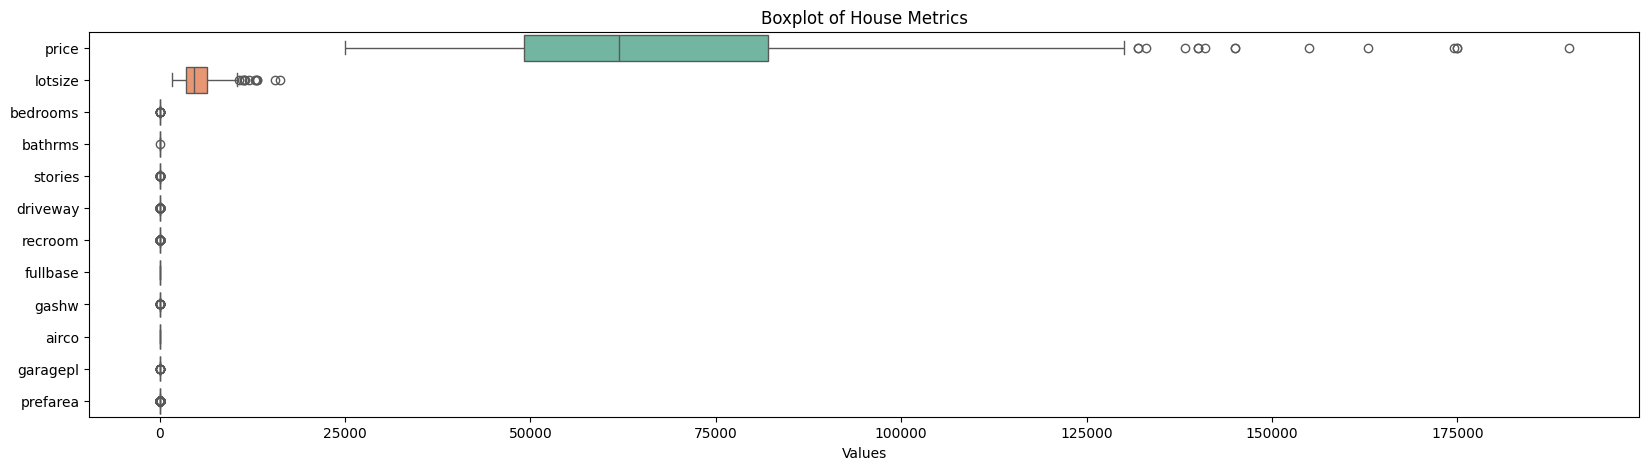

In [335]:
# Ploting the boxplot
plt.figure(figsize=(20, 5))
sns.boxplot(data=data, orient='h', palette='Set2')
plt.title('Boxplot of House Metrics')
plt.xlabel('Values')
plt.show()

In [336]:

# Calculate outlier bounds for 'price' and 'lotsize'
outlier_bounds_price = outlier_bounds(data['price'])
outlier_bounds_lotsize = outlier_bounds(data['lotsize'])

# Check if the outlier bounds are not None before unpacking
if outlier_bounds_price is not None and outlier_bounds_lotsize is not None:
    price_lower, price_upper = outlier_bounds_price
    lotsize_lower, lotsize_upper = outlier_bounds_lotsize

    # Create a mask for rows without outliers
    mask_no_outliers = ((data['price'] >= price_lower) & (data['price'] <= price_upper) &
                        (data['lotsize'] >= lotsize_lower) & (data['lotsize'] <= lotsize_upper))

    # Apply the mask to the DataFrame
    data = data[mask_no_outliers]

else:
    print("No outliers detected.")


In [337]:
# Defining the features and target variable
X = data[['lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea']]
y = data['price']

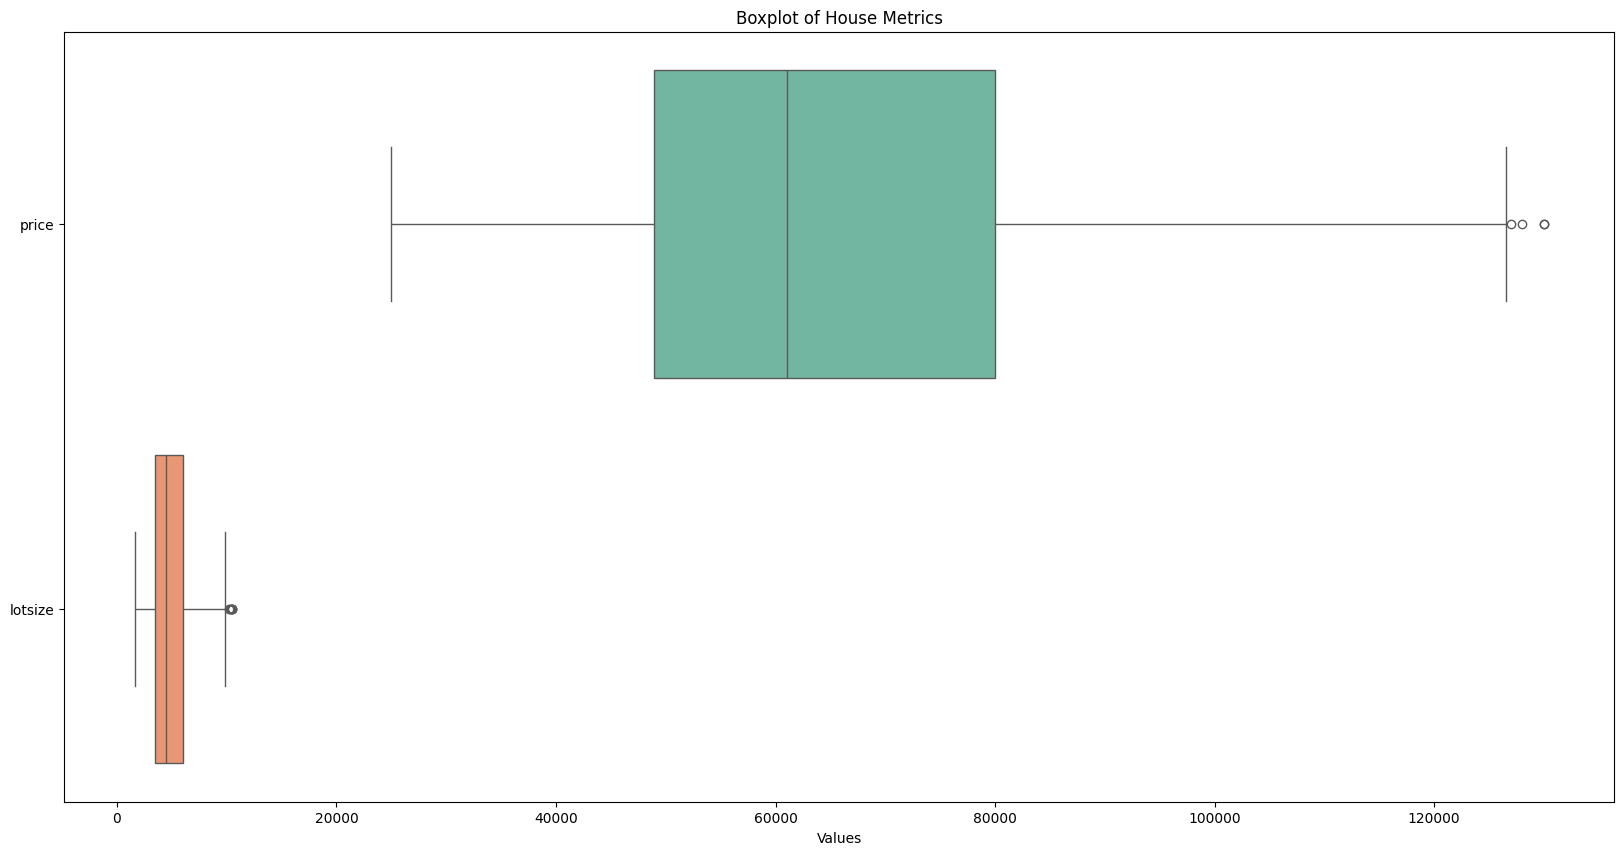

In [340]:
# Plot the boxplot
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[['price', 'lotsize']], orient='h', palette='Set2')
plt.title('Boxplot of House Metrics')
plt.xlabel('Values')
plt.show()


In [353]:
# Removing Outliers further
data = data[(data['price'] < 80000) &
            (data['lotsize'] < 6000)]



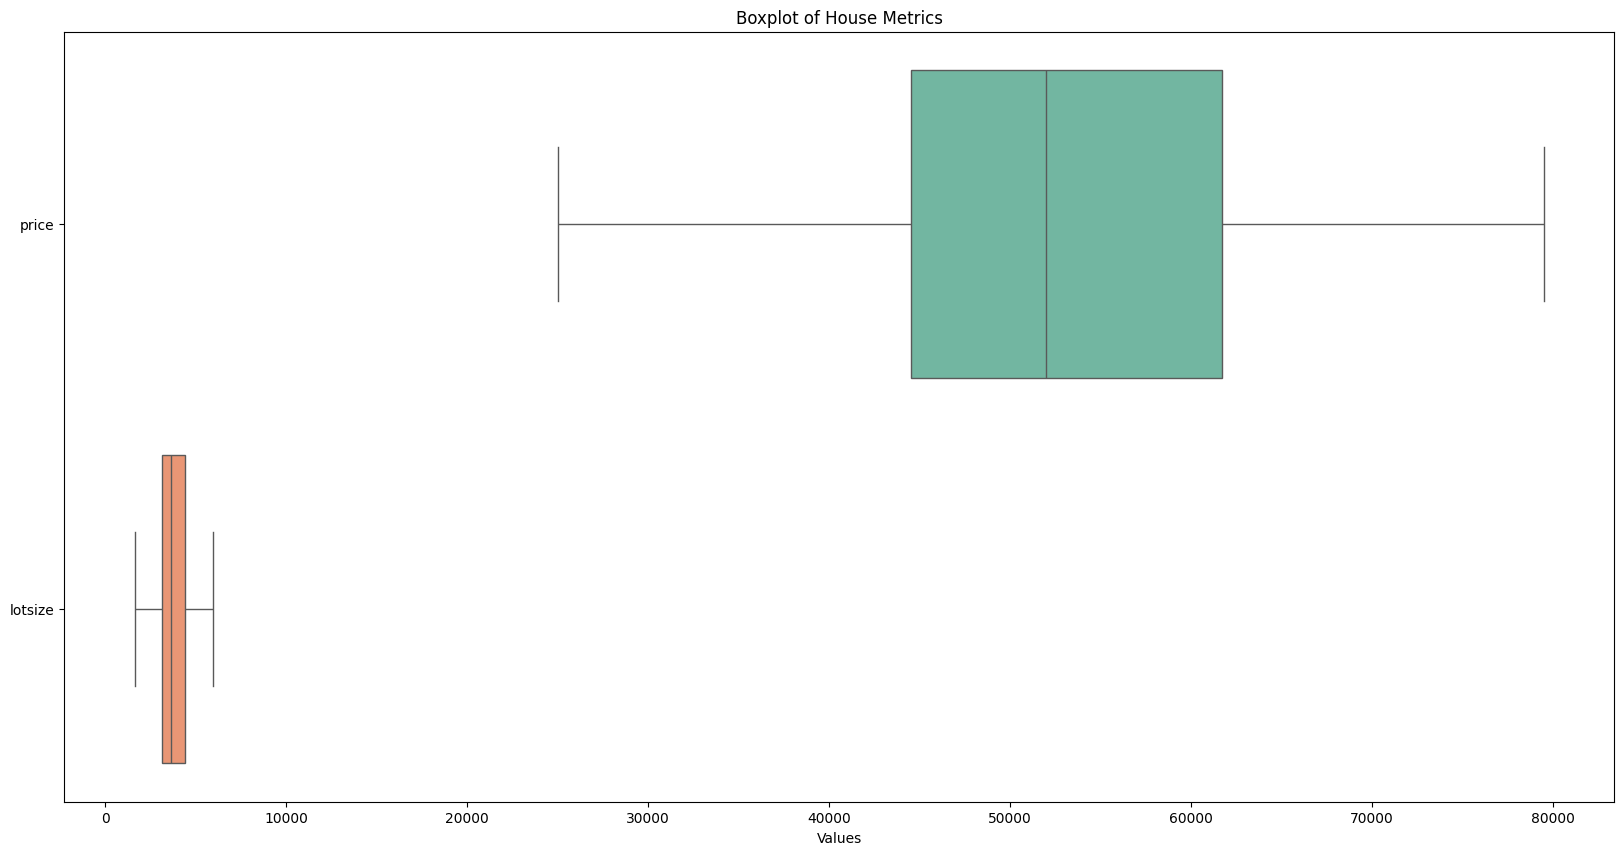

In [354]:
# Let's see outliers are removed or not
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[['price', 'lotsize']], orient='h', palette='Set2')
plt.title('Boxplot of House Metrics')
plt.xlabel('Values')
plt.show()


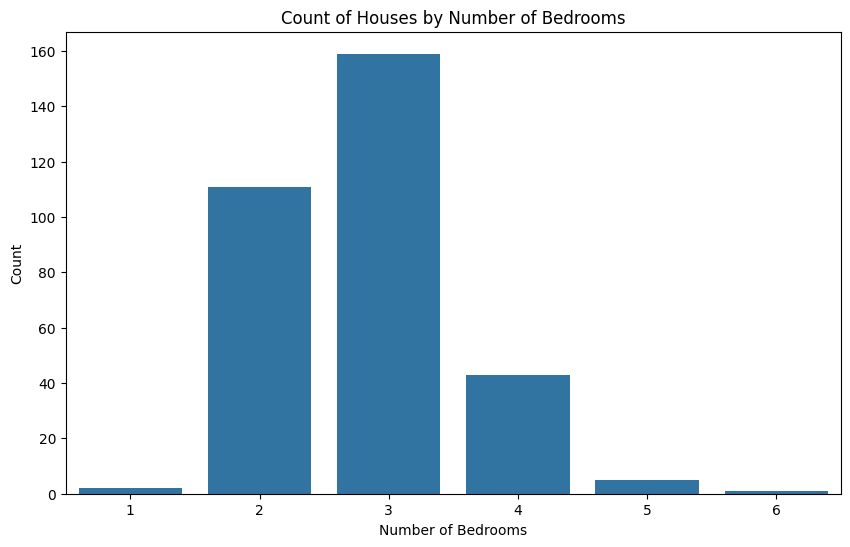

In [356]:
# Barplot to visualize the distribution of houses by number of bedrooms
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=data)
plt.title('Count of Houses by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

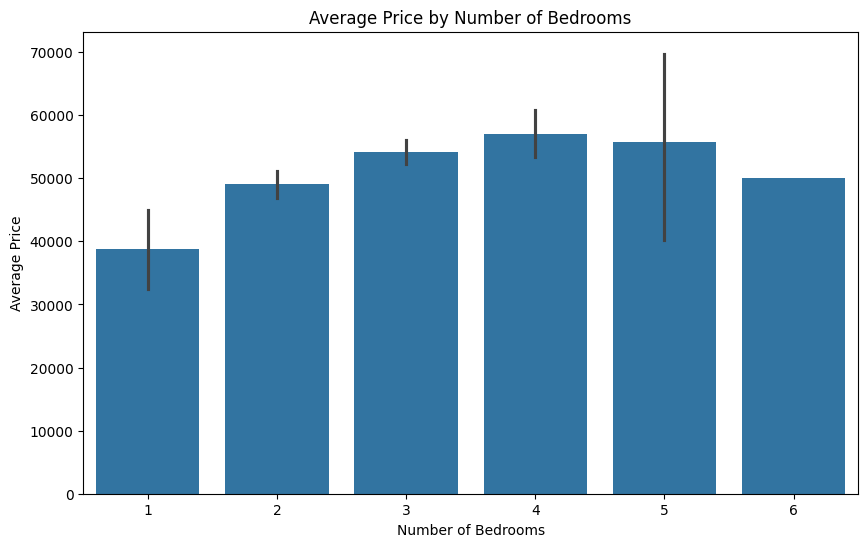

In [357]:
#Barplot to visualize Average prices by Number of Bedrooms
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='price', data=data)
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()



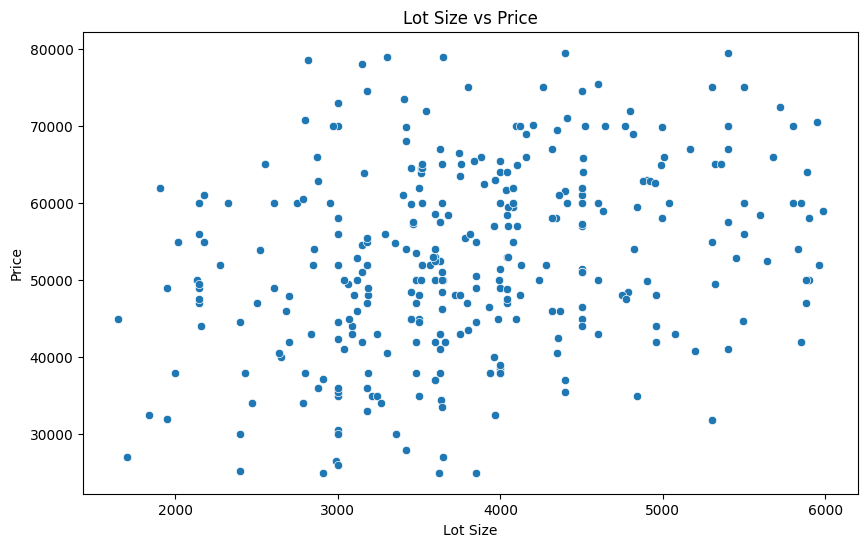

In [358]:
#Scatterplot to visualize relationship between Lot Size and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lotsize', y='price', data=data)
plt.title('Lot Size vs Price')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.show()


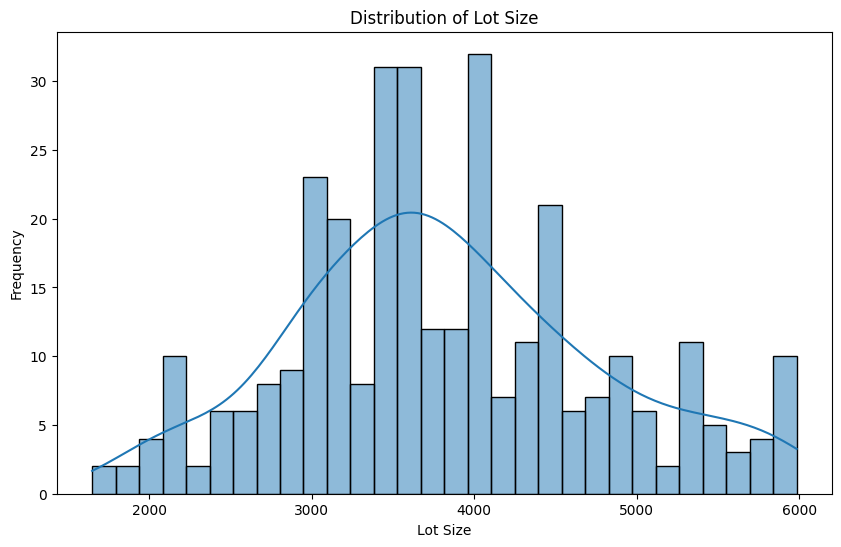

In [360]:
#Histogram to visualize the distribution of lot size
plt.figure(figsize=(10, 6))
sns.histplot(data['lotsize'], bins=30, kde=True)
plt.title('Distribution of Lot Size')
plt.xlabel('Lot Size')
plt.ylabel('Frequency')
plt.show()


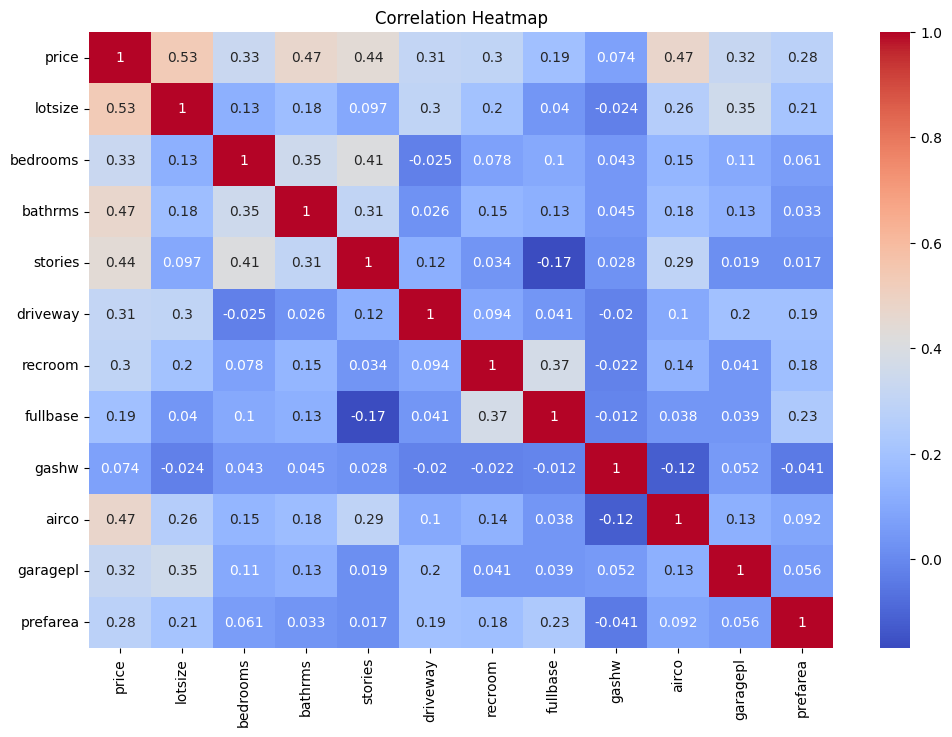

In [346]:
# Heatmap to visualize the correlation between variables
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Model Building

In [364]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [365]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [366]:
# Standardizing the features using Standard Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [367]:
# Modeling
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [351]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R^2) Score:", r2)

Root Mean Squared Error (RMSE): 11391.130147172003
R-squared (R^2) Score: 0.7471154326157805


In [352]:
accuracy_score = r2_score(y_test, y_pred)
print("Accuracy Score:", accuracy_score)

Accuracy Score: 0.7471154326157805
